The code part of the project starts here

#PART I Morphological thesis
Contains:<br>
data loading<br>
preprocessing<br>
analysis based on morphological parsing.
<br>In conclusion it has a comparison with part of speech frequencies from paper

First we'll install pymorphy and unarchive our .rar file


In [1]:
!pip install -q pymorphy2
!unrar x "sentiment_data.rar" "."

     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 8.2 MB 64.6 MB/s 

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from sentiment_data.rar

Extracting  ./positive.csv                                                 0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52%  OK 
Extracting  ./negative.csv                                                52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76%

Next, we import libraries

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
import numpy as np
from collections import defaultdict, Counter

from tqdm import tqdm

from sklearn.utils import shuffle

Load the datasets and combine them, because the files are separate for each class<br>
Data first given in 

In [ ]:
names=["id", "tdate", "tmane", "ttext", "ttype", "trep", "trtv", "tfav", "tstcount", "tfol", "tfrien", "listcount"]
positive = pd.read_csv("positive.csv", delimiter=";", header=None, names=names)
negative = pd.read_csv("negative.csv", delimiter=";", header=None, names=names)

df = pd.concat([positive, negative])
df = df.dropna().drop_duplicates()
df

,id,tdate,tmane,ttext,ttype,trep,trtv,tfav,tstcount,tfol,tfrien,listcount
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
111918,425138243257253888,1390195830,Yanch_96,Но не каждый хочет что то исправлять:( http://...,-1,0,0,0,1138,32,46,0
111919,425138339503943682,1390195853,tkit_on,скучаю так :-( только @taaannyaaa вправляет мо...,-1,0,0,0,4822,38,32,0
111920,425138437684215808,1390195876,ckooker1,"Вот и в школу, в говно это идти уже надо(",-1,0,0,1,165,13,16,0
111921,425138490452344832,1390195889,LisaBeroud,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",-1,0,1,0,2516,187,265,0


Download russian stopwords for nltk library to delete all unnecessary words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

*   Import the libraries for morphological processing
*   Get regular expression to clean the text from symbols
*   Create lemmatization function with stopwords removal

In [ ]:
import re
import nltk

from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

Out of whole dataset we keep post text and it's type. Our text will be morphologically processed to see if the distribution is the same in this dataset as it's stated in paper: <br>
Части речи // Материалы к корпусной грамматике русского языка. Выпуск III : Части речи и лексико-грамматические классы. СПб.: Нестор-История, 2018. С. 9–39.

In [ ]:
worddata = df[['ttext', 'ttype']]
worddata['words'] = df.ttext.apply(lemmatize)
worddata = worddata.dropna()
worddata.words

<ipython-input-6-10c3b3c85fad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worddata['words'] = df.ttext.apply(lemmatize)


0         [школотый, поверь, самый, общество, профилиров...
1          [да, таки, немного, похожий, но, мальчик, равно]
2                                 [ну, идиотка, испугаться]
3         [кто, угол, сидеть, погибать, голод, ещё, порц...
4         [вот, значит, страшилка, но, блин, посмотреть,...
                                ...                        
111918                     [но, каждый, хотеть, исправлять]
111919           [скучать, вправлять, мозг, равно, скучать]
111920                       [вот, школа, говно, это, идти]
111921                           [тауриэль, грусть, обнять]
111922    [такси, везти, работа, раздумывать, приплатить...
Name: words, Length: 214199, dtype: object

Now we create morphological scheme of the message represented as parts-of-speech list and count the whole utterance length

In [ ]:
POS = []
POS_num = []
for index, row in worddata.iterrows():
    all_POSes = []
    for word in row['words']:
        all_POSes.append(morph.parse(word)[0].tag.POS)
    POS.append(all_POSes)
    POS_num.append(len(all_POSes))

worddata['POS'] = POS
worddata['words_number'] = POS_num
worddata

,ttext,ttype,words,POS,words_number
0,"@first_timee хоть я и школота, но поверь, у на...",1,"[школотый, поверь, самый, общество, профилиров...","[ADJF, CONJ, ADJF, NOUN, INFN, NOUN, NOUN]",7
1,"Да, все-таки он немного похож на него. Но мой ...",1,"[да, таки, немного, похожий, но, мальчик, равно]","[PRCL, PRCL, ADVB, ADJF, CONJ, NOUN, CONJ]",7
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,"[ну, идиотка, испугаться]","[PRCL, NOUN, INFN]",3
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,"[кто, угол, сидеть, погибать, голод, ещё, порц...","[NPRO, NOUN, INFN, INFN, NOUN, ADVB, NOUN, INF...",12
4,@irina_dyshkant Вот что значит страшилка :D\nН...,1,"[вот, значит, страшилка, но, блин, посмотреть,...","[PRCL, CONJ, NOUN, CONJ, INTJ, INFN, NOUN, INF...",11
...,...,...,...,...,...
111918,Но не каждый хочет что то исправлять:( http://...,-1,"[но, каждый, хотеть, исправлять]","[CONJ, ADJF, INFN, INFN]",4
111919,скучаю так :-( только @taaannyaaa вправляет мо...,-1,"[скучать, вправлять, мозг, равно, скучать]","[INFN, INFN, NOUN, CONJ, INFN]",5
111920,"Вот и в школу, в говно это идти уже надо(",-1,"[вот, школа, говно, это, идти]","[PRCL, NOUN, NOUN, PRCL, INFN]",5
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",-1,"[тауриэль, грусть, обнять]","[NOUN, NOUN, INFN]",3


Count all the parts of speech

In [ ]:
noun_counted = []
adj_counted = []
verb_counted = []
numr_counted = []
advb_counted = []
pron_counted = []
prep_counted = []
conj_counted = []
part_counted =[]
intj_counted = []

for index, row in worddata.iterrows():
    noun_counted.append(row['POS'].count('NOUN'))
    adj_counted.append(row['POS'].count('ADJF') + row['POS'].count('ADJS') + row['POS'].count('COMP'))
    verb_counted.append(row['POS'].count('VERB') + row['POS'].count('INFN'))
    numr_counted.append(row['POS'].count('NUMR'))
    advb_counted.append(row['POS'].count('ADVB'))
    pron_counted.append(row['POS'].count('NPRO'))
    prep_counted.append(row['POS'].count('PREP'))
    conj_counted.append(row['POS'].count('CONJ'))
    part_counted.append(row['POS'].count('PRCL'))
    intj_counted.append(row['POS'].count('INTJ'))

worddata['nouns_number'] = noun_counted
worddata['adjectives_number'] = adj_counted
worddata['verb_number'] = verb_counted
worddata['numeric_number'] = numr_counted
worddata['adverb_number'] = advb_counted
worddata['pronoun_number'] = pron_counted
worddata['preposition_number'] = prep_counted
worddata['conjunction_number'] = conj_counted
worddata['particles_number'] = part_counted
worddata['interjection_number'] = intj_counted

worddata

,ttext,ttype,words,POS,words_number,nouns_number,adjectives_number,verb_number,numeric_number,adverb_number,pronoun_number,preposition_number,conjunction_number,particles_number,interjection_number
0,"@first_timee хоть я и школота, но поверь, у на...",1,"[школотый, поверь, самый, общество, профилиров...","[ADJF, CONJ, ADJF, NOUN, INFN, NOUN, NOUN]",7,3,2,1,0,0,0,0,1,0,0
1,"Да, все-таки он немного похож на него. Но мой ...",1,"[да, таки, немного, похожий, но, мальчик, равно]","[PRCL, PRCL, ADVB, ADJF, CONJ, NOUN, CONJ]",7,1,1,0,0,1,0,0,2,2,0
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,"[ну, идиотка, испугаться]","[PRCL, NOUN, INFN]",3,1,0,1,0,0,0,0,0,1,0
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,"[кто, угол, сидеть, погибать, голод, ещё, порц...","[NPRO, NOUN, INFN, INFN, NOUN, ADVB, NOUN, INF...",12,3,0,5,0,1,1,0,1,0,0
4,@irina_dyshkant Вот что значит страшилка :D\nН...,1,"[вот, значит, страшилка, но, блин, посмотреть,...","[PRCL, CONJ, NOUN, CONJ, INTJ, INFN, NOUN, INF...",11,4,0,3,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111918,Но не каждый хочет что то исправлять:( http://...,-1,"[но, каждый, хотеть, исправлять]","[CONJ, ADJF, INFN, INFN]",4,0,1,2,0,0,0,0,1,0,0
111919,скучаю так :-( только @taaannyaaa вправляет мо...,-1,"[скучать, вправлять, мозг, равно, скучать]","[INFN, INFN, NOUN, CONJ, INFN]",5,1,0,3,0,0,0,0,1,0,0
111920,"Вот и в школу, в говно это идти уже надо(",-1,"[вот, школа, говно, это, идти]","[PRCL, NOUN, NOUN, PRCL, INFN]",5,2,0,1,0,0,0,0,0,2,0
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",-1,"[тауриэль, грусть, обнять]","[NOUN, NOUN, INFN]",3,2,0,1,0,0,0,0,0,0,0


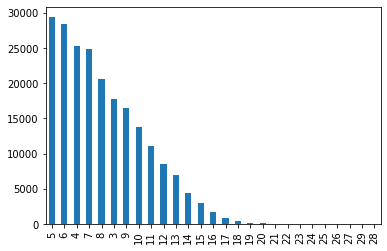

In [ ]:
#@title check the distribution of posts' length
worddata['words_number'].value_counts().plot(kind='bar')

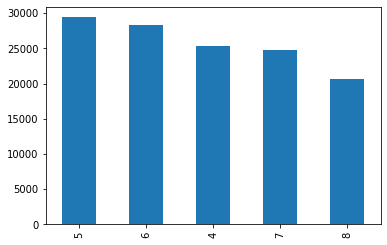

In [ ]:
#@title we'll take a closer look at top-5 most common
worddata['words_number'].value_counts()[:5].plot(kind='bar')

In [ ]:
#@title Now we check if 5 is the mode, also we'll get mean and median for sentences length
print('mode', worddata['words_number'].mode())
print('mean', worddata['words_number'].mean())
print('median', worddata['words_number'].median())

mode 0    5
dtype: int64
mean 7.378283745489008
median 7.0


Let's see a plot, mode, median and mean for every part of speech
(plot here doesn't work in iteration so we'll call them 1 by 1)

mode 0    2
dtype: int64
mean 2.7871371948515167
median 2.0


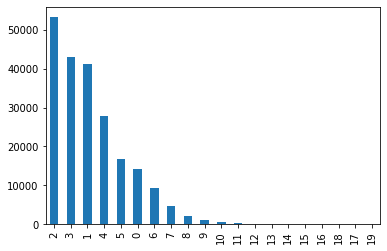

In [ ]:
worddata['nouns_number'].value_counts().plot(kind='bar')
print('mode', worddata['nouns_number'].mode())
print('mean', worddata['nouns_number'].mean())
print('median', worddata['nouns_number'].median())

mode 0    0
dtype: int64
mean 0.9557234160757053
median 1.0


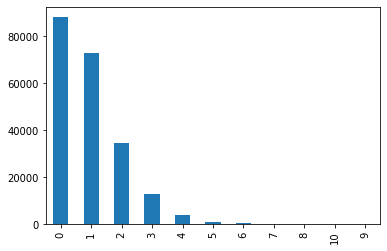

In [ ]:
worddata['adjectives_number'].value_counts().plot(kind='bar')
print('mode', worddata['adjectives_number'].mode())
print('mean', worddata['adjectives_number'].mean())
print('median', worddata['adjectives_number'].median())

mode 0    1
dtype: int64
mean 1.845601520081793
median 2.0


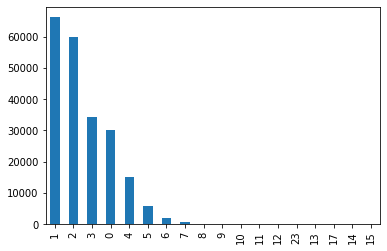

In [ ]:
worddata['verb_number'].value_counts().plot(kind='bar')
print('mode', worddata['verb_number'].mode())
print('mean', worddata['verb_number'].mean())
print('median', worddata['verb_number'].median())

mode 0    0
dtype: int64
mean 0.01872557761707571
median 0.0


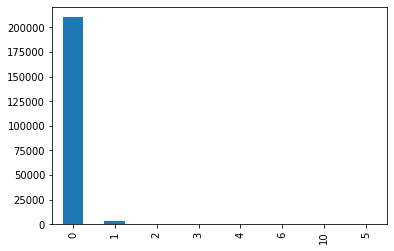

In [ ]:
worddata['numeric_number'].value_counts().plot(kind='bar')
print('mode', worddata['numeric_number'].mode())
print('mean', worddata['numeric_number'].mean())
print('median', worddata['numeric_number'].median())

mode 0    0
dtype: int64
mean 0.5941764434007628
median 0.0


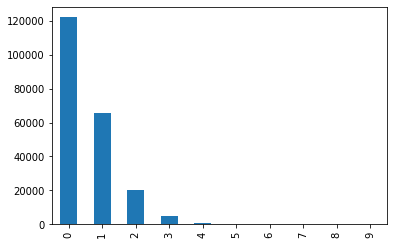

In [ ]:
worddata['adverb_number'].value_counts().plot(kind='bar')
print('mode', worddata['adverb_number'].mode())
print('mean', worddata['adverb_number'].mean())
print('median', worddata['adverb_number'].median())

mode 0    0
dtype: int64
mean 0.21352107152694458
median 0.0


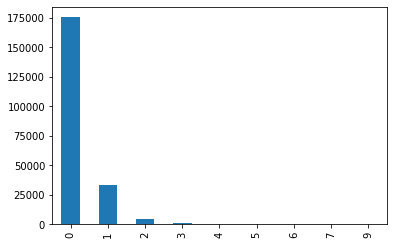

In [ ]:
worddata['pronoun_number'].value_counts().plot(kind='bar')
print('mode', worddata['pronoun_number'].mode())
print('mean', worddata['pronoun_number'].mean())
print('median', worddata['pronoun_number'].median())

mode 0    0
dtype: int64
mean 0.12367938225668654
median 0.0


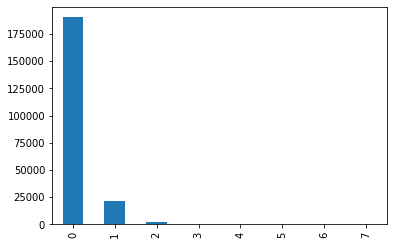

In [ ]:
worddata['preposition_number'].value_counts().plot(kind='bar')
print('mode', worddata['preposition_number'].mode())
print('mean', worddata['preposition_number'].mean())
print('median', worddata['preposition_number'].median())

mode 0    0
dtype: int64
mean 0.22547257456850872
median 0.0


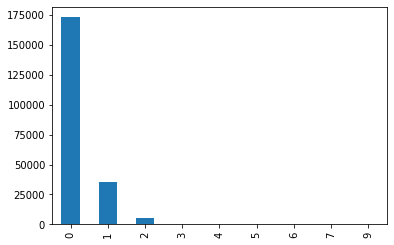

In [ ]:
worddata['conjunction_number'].value_counts().plot(kind='bar')
print('mode', worddata['conjunction_number'].mode())
print('mean', worddata['conjunction_number'].mean())
print('median', worddata['conjunction_number'].median())

mode 0    0
dtype: int64
mean 0.28682206732991283
median 0.0


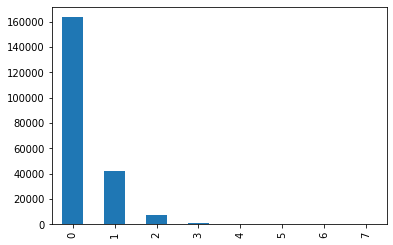

In [ ]:
worddata['particles_number'].value_counts().plot(kind='bar')
print('mode', worddata['particles_number'].mode())
print('mean', worddata['particles_number'].mean())
print('median', worddata['particles_number'].median())

mode 0    0
dtype: int64
mean 0.10033660287863155
median 0.0


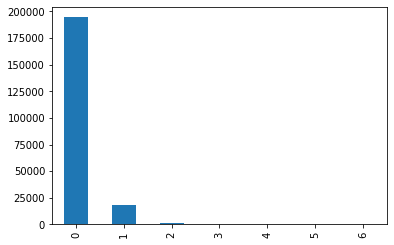

In [ ]:
worddata['interjection_number'].value_counts().plot(kind='bar')
print('mode', worddata['interjection_number'].mode())
print('mean', worddata['interjection_number'].mean())
print('median', worddata['interjection_number'].median())

Now we'll check percentage of our Parts of speech

In [ ]:
POS_in_percents = {}
for i in worddata[['nouns_number', 'adjectives_number', 'verb_number', 
                  'numeric_number', 'adverb_number', 'pronoun_number', 
                  'preposition_number', 'conjunction_number', 
                  'particles_number', 'interjection_number']]:
    POS_in_percents[i] = worddata[i].sum()/worddata['words_number'].sum()*100

sorted(((percent, key) for (key,percent) in POS_in_percents.items()), reverse=True)

[(37.77487137920845, 'nouns_number'),
 (25.01396779718822, 'verb_number'),
 (12.953194117263692, 'adjectives_number'),
 (8.053044093947118, 'adverb_number'),
 (3.887381906466695, 'particles_number'),
 (3.0558946002362664, 'conjunction_number'),
 (2.893912444848556, 'pronoun_number'),
 (1.6762622111450052, 'preposition_number'),
 (1.359890813903384, 'interjection_number'),
 (0.2537931348672284, 'numeric_number')]

So our top is different from the one in the paper
We can see that Nouns are still the most used part of speech<br>
Also verbs have high increase in place taken<br>
We can also see that every part of speech increased in percents, but it should be the outcome of our texts being really short

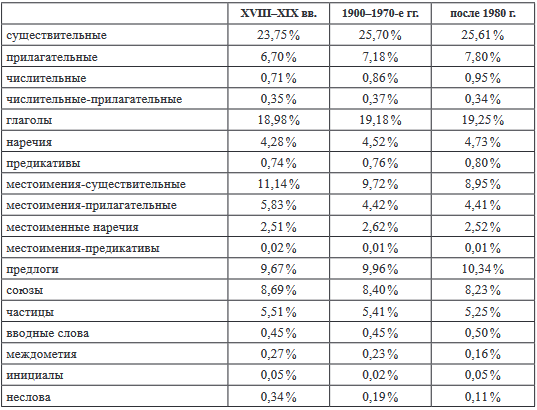

#PART II Sentiment analysis as classification task
Now we'll move to our prediction attempts.<br>
We had our answer based on papers and researches<br>
Our next goal is try to predict message class given in dataset in "ttype" column
This type represents sentiment class: <br>1 - positive<br> -1 - negative<br>
We'll try to train classic classifiers based on morphological data and 'social data'.

First of all we check if we have everything we need in the same dataframe

In [ ]:
worddata.columns

Index(['ttext', 'ttype', 'words', 'POS', 'words_number', 'nouns_number',
       'adjectives_number', 'verb_number', 'numeric_number', 'adverb_number',
       'pronoun_number', 'preposition_number', 'conjunction_number',
       'particles_number', 'interjection_number'],
      dtype='object')

Now let's check class distribution to see if its even

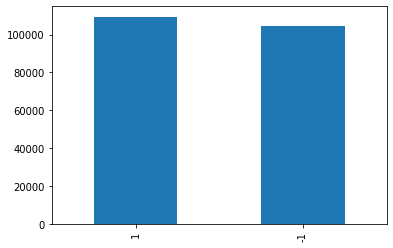

In [ ]:
worddata.ttype.value_counts().plot(kind='bar')

Now we replace -1 label given in dataset with 0 for classification to be correct. <br>Having 0 as negative label and 1 as positive


In [ ]:
worddata.loc[(worddata.ttype == -1), ('ttype')] = 0

And shuffle the dataset to see if it's applied correctly

In [ ]:
from sklearn.utils import shuffle
worddata = shuffle(worddata)
worddata

,ttext,ttype,words,POS,words_number,nouns_number,adjectives_number,verb_number,numeric_number,adverb_number,pronoun_number,preposition_number,conjunction_number,particles_number,interjection_number
49157,"Она повалила доску, но все-равно не сможет пер...",1,"[она, повалить, доска, равно, смочь, переехать]","[NPRO, INFN, NOUN, CONJ, INFN, INFN]",6,1,0,3,0,0,1,0,1,0,0
90340,RT @_Do_or_Die__: Люблю такие моменты\nМоменты...,0,"[любить, такой, момент, момент, фэндом, объеди...","[INFN, ADJF, NOUN, NOUN, NOUN, INFN, NPRO, ADJ...",9,3,2,2,0,0,1,0,0,0,0
110682,RT @Krylova_Ek: На выезд #детиулиц в Тверскую ...,1,"[на, выезд, детиулица, тверская, область, рабо...","[PREP, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOU...",9,8,0,0,0,0,0,1,0,0,0
59725,@Uprav_Dom @rianru не ну торганул канешна))) б...,1,"[торганула, канешный, мочь]","[NOUN, ADJF, NOUN]",3,2,1,0,0,0,0,0,0,0,0
82191,"Пока не рискну, не узнаю правильно ли я поступ...",0,"[пока, рискнуть, узнавать, правильно, поступать]","[ADVB, INFN, INFN, ADVB, INFN]",5,0,0,3,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54844,"@airat006 Понятно) Ну ничего, еще чуть-чуть и ...",1,"[понятно, ну, гонять, быть]","[ADVB, PRCL, INFN, INFN]",4,0,0,2,0,1,0,0,0,1,0
50167,@lynx_per_se Меня так бесят ребята с потока :(...,0,"[я, бесить, ребята, поток, просто, кошмар, так...","[NPRO, INFN, NOUN, NOUN, PRCL, NOUN, ADJF, NOU...",11,6,1,2,0,0,1,0,0,1,0
98508,я вам искренне сочувствую.. и вас мадам климак...,1,"[искренне, сочувствовать, мадам, климакс, дост...","[ADVB, INFN, NOUN, NOUN, INFN, INFN, INFN, PRCL]",8,2,0,4,0,1,0,0,0,1,0
240,Первый экзамен 10 января)а последний 23)удачно...,1,"[первый, экзамен, январь, последний, удачно, ура]","[ADJF, NOUN, NOUN, ADJF, ADVB, INTJ]",6,2,2,0,0,1,0,0,0,0,1


Our task now is to implement binary classification<br>
For our analysis we chose the most common classification algorithms

*   Support Vector Machines
*   Naive Bayes
*   Nearest Neighbor
*   Decision Trees
*   Logistic Regression

First of all, we need to select columns we'll use as predictors and label

In [ ]:
X = worddata[['nouns_number', 'adjectives_number', 'verb_number', 
              'numeric_number', 'adverb_number', 'pronoun_number', 
              'preposition_number', 'conjunction_number', 'particles_number',
              'interjection_number']]
Y = worddata['ttype']

Then split the data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.25, random_state=42)

And we also use StandardScaler because we need features to look like standard normally distributed data or at least close to that

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

We import the Support Vector Classifier and train it

In [ ]:
from sklearn import svm
svc_clf= svm.SVC()
svc_clf.fit(X, Y)

SVC()

As our main comparison metrics we chose to check the accuracy and also provide confusion matrix for it to be more human-readable, thus we have

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


True Positive(TP)  =  13129
False Positive(FP) =  10525
True Negative(TN)  =  15657
False Negative(FN) =  14239
Accuracy of the binary classifier = 0.538


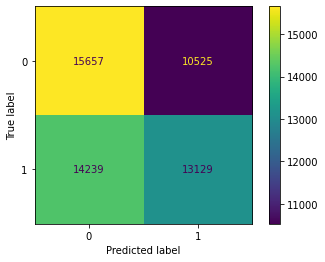

In [ ]:
#@title Support Vector Classifier
y_pred = svc_clf.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

conma = confusion_matrix(y_test, y_pred, labels=svc_clf.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=conma,
                              display_labels=svc_clf.classes_)
cmplot.plot()

True Positive(TP)  =  16097
False Positive(FP) =  13059
True Negative(TN)  =  13123
False Negative(FN) =  11271
Accuracy of the binary classifier = 0.546


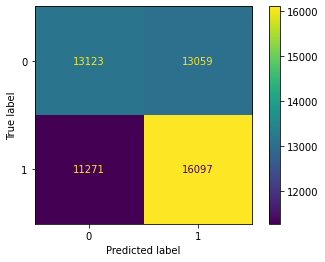

In [ ]:
#@title Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB().fit(X_train, y_train)

nb_pred = NB.predict(X_test)

cm = confusion_matrix(y_test, nb_pred)

TN, FP, FN, TP = confusion_matrix(y_test, nb_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Gaussianmatrix = confusion_matrix(y_test, nb_pred, labels=NB.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=Gaussianmatrix,
                              display_labels=NB.classes_)
cmplot.plot()

True Positive(TP)  =  14984
False Positive(FP) =  13104
True Negative(TN)  =  13078
False Negative(FN) =  12384
Accuracy of the binary classifier = 0.524


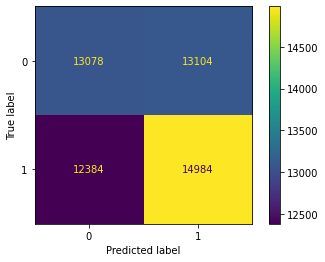

In [ ]:
#@title K-nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

k_neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

k_neigh_pred = k_neigh.predict(X_test)

cm = confusion_matrix(y_test, k_neigh_pred)

TN, FP, FN, TP = confusion_matrix(y_test, k_neigh_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

kmatr = confusion_matrix(y_test, k_neigh_pred, labels=k_neigh.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=kmatr,
                              display_labels=k_neigh.classes_)
cmplot.plot()

True Positive(TP)  =  13965
False Positive(FP) =  10695
True Negative(TN)  =  15487
False Negative(FN) =  13403
Accuracy of the binary classifier = 0.550


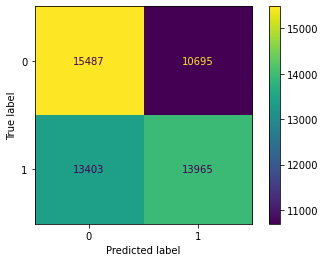

In [ ]:
#@title Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier().fit(X_train, y_train)

treeclf_pred = treeclf.predict(X_test)

cm = confusion_matrix(y_test, treeclf_pred)

TN, FP, FN, TP = confusion_matrix(y_test, treeclf_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

tree_matr = confusion_matrix(y_test, treeclf_pred, labels=treeclf.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=tree_matr,
                              display_labels=treeclf.classes_)
cmplot.plot()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


True Positive(TP)  =  16386
False Positive(FP) =  13073
True Negative(TN)  =  13109
False Negative(FN) =  10982
Accuracy of the binary classifier = 0.551


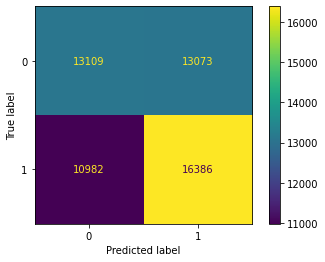

In [ ]:
#@title and Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

lgreg = LogisticRegression(verbose=True).fit(X_train, y_train)

lgreg_pred = lgreg.predict(X_test)

cm = confusion_matrix(y_test, lgreg_pred)

TN, FP, FN, TP = confusion_matrix(y_test, lgreg_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

regmat = confusion_matrix(y_test, lgreg_pred, labels=lgreg.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=regmat,
                              display_labels=lgreg.classes_)
cmplot.plot()

As we can see in the cells outputs above, our algorithms have accuracy close to 50%. In binary classification task we can say that our classifiers are merely "Guessing" the right answer 50% of the time.<br>
Thus, we conclude that we can't solve sentiment analysis task based on purely morphological structure<br>
Our next step is to check if social data will be better in this task

##Classifiers based on social data

First of all, we should make clear what social data is<br>
This is the part of given dataset we didn't use before, columns being:<br>
– trep: number of replies (at the moment Twitter API doesn't give this data);<br>
– tfav: number of post being marked as favorite;<br>
– tstcount: number of all messages by user;<br>
– tfol: number of followers;<br>
– tfrien: number of friends;<br>
– listcount: number of follows.

In [ ]:
#@title these imports aren't neccesary, we just had them to restart without training models from Part I
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


df = df.dropna()
df.loc[(df.ttype == -1), ('ttype')] = 0
X = df[['tfav', 'tstcount', 'tfol', 'tfrien', 'listcount']]
Y = df['ttype']

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


True Positive(TP)  =  0
False Positive(FP) =  0
True Negative(TN)  =  28108
False Negative(FN) =  28601
Accuracy of the binary classifier = 0.496


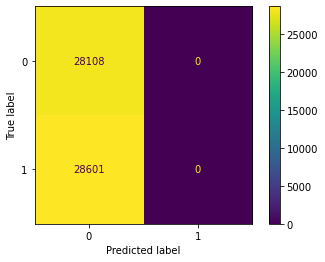

In [ ]:
#@title Support Vector Classifier based on social data
social_svc = svm.SVC()
social_svc.fit(X, Y)

y_pred = social_svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

confma = confusion_matrix(y_test, y_pred, labels=social_svc.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=confma,
                              display_labels=social_svc.classes_)
cmplot.plot()

True Positive(TP)  =  26840
False Positive(FP) =  26493
True Negative(TN)  =  1615
False Negative(FN) =  1761
Accuracy of the binary classifier = 0.502


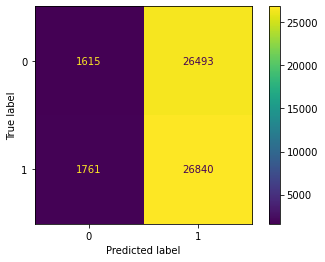

In [ ]:
#@title Naive Bayes Classifier based on social data
social_NB = GaussianNB().fit(X_train, y_train)

soc_nb_pred = social_NB.predict(X_test)

cm = confusion_matrix(y_test, soc_nb_pred)

TN, FP, FN, TP = confusion_matrix(y_test, soc_nb_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Gaussian_social_matrix = confusion_matrix(y_test, soc_nb_pred, labels=social_NB.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=Gaussian_social_matrix,
                              display_labels=social_NB.classes_)
cmplot.plot()

True Positive(TP)  =  14198
False Positive(FP) =  12616
True Negative(TN)  =  15492
False Negative(FN) =  14403
Accuracy of the binary classifier = 0.524


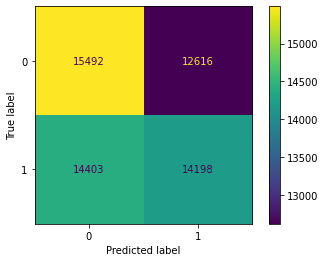

In [ ]:
#@title K-nearest Neigbors Classifier based on social data
k_neigh_soc = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

k_neigh_soc_pred = k_neigh_soc.predict(X_test)

cm = confusion_matrix(y_test, k_neigh_soc_pred)

TN, FP, FN, TP = confusion_matrix(y_test, k_neigh_soc_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

soc_kmatr = confusion_matrix(y_test, k_neigh_soc_pred, labels=k_neigh_soc.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=soc_kmatr,
                              display_labels=k_neigh_soc.classes_)
cmplot.plot()

True Positive(TP)  =  14523
False Positive(FP) =  13550
True Negative(TN)  =  14558
False Negative(FN) =  14078
Accuracy of the binary classifier = 0.513


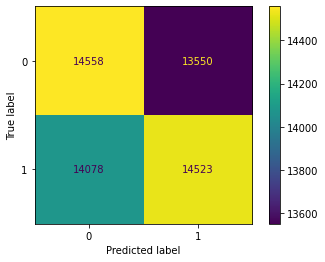

In [ ]:
#@title Decision Tree Classifier based on social data
social_treeclf = DecisionTreeClassifier().fit(X_train, y_train)

soc_treeclf_pred = social_treeclf.predict(X_test)

cm = confusion_matrix(y_test, soc_treeclf_pred)

TN, FP, FN, TP = confusion_matrix(y_test, soc_treeclf_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

soc_tree_matr = confusion_matrix(y_test, soc_treeclf_pred, labels=social_treeclf.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=soc_tree_matr,
                              display_labels=social_treeclf.classes_)
cmplot.plot()

True Positive(TP)  =  26741
False Positive(FP) =  25951
True Negative(TN)  =  2157
False Negative(FN) =  1860
Accuracy of the binary classifier = 0.510


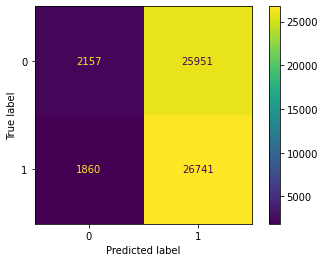

In [ ]:
#@title Logistic Regression Classifier based on social data
from sklearn.linear_model import LogisticRegression

soc_lgreg = LogisticRegression().fit(X_train, y_train)

soc_lgreg_pred = soc_lgreg.predict(X_test)

cm = confusion_matrix(y_test, soc_lgreg_pred)

TN, FP, FN, TP = confusion_matrix(y_test, soc_lgreg_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

soc_regmat = confusion_matrix(y_test, soc_lgreg_pred, labels=soc_lgreg.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=soc_regmat,
                              display_labels=soc_lgreg.classes_)
cmplot.plot()

The results here show that social data is even worse for predictions and we are still at the moment where our models are guessing the answers purely by coincidence<br> it can be seen well in SVC, where it predicts just one label, but sometimes it does it correctly

##Classifiers based on both linguistic and social data

Now we'll make another dataframe with all the data we tried to use before, we'll try to combine our morphological approach and social data to see if it can be applied to this task

It may look weird to do the same preprocessing all over again, but we need this to have full data with all rows filled, so our training examples wouldn't mess our models.

In [ ]:
names=["id", "tdate", "tmane", "ttext", "ttype", "trep", "trtv", "tfav", "tstcount", "tfol", "tfrien", "listcount"]
positive = pd.read_csv("positive.csv", delimiter=";", header=None, names=names)
negative = pd.read_csv("negative.csv", delimiter=";", header=None, names=names)
df = pd.concat([positive, negative])
df = df.dropna().drop_duplicates()

df['words'] = df.ttext.apply(lemmatize)
df = df.dropna()

POS = []
POS_num = []
for index, row in df.iterrows():
    all_POSes = []
    for word in row['words']:
        all_POSes.append(morph.parse(word)[0].tag.POS)
    POS.append(all_POSes)
    POS_num.append(len(all_POSes))

df['POS'] = POS
df['words_number'] = POS_num
df

,id,tdate,tmane,ttext,ttype,trep,trtv,tfav,tstcount,tfol,tfrien,listcount,words,POS,words_number
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0,"[школотый, поверь, самый, общество, профилиров...","[ADJF, CONJ, ADJF, NOUN, INFN, NOUN, NOUN]",7
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2,"[да, таки, немного, похожий, но, мальчик, равно]","[PRCL, PRCL, ADVB, ADJF, CONJ, NOUN, CONJ]",7
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0,"[ну, идиотка, испугаться]","[PRCL, NOUN, INFN]",3
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0,"[кто, угол, сидеть, погибать, голод, ещё, порц...","[NPRO, NOUN, INFN, INFN, NOUN, ADVB, NOUN, INF...",12
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\nН...,1,0,0,0,597,16,23,1,"[вот, значит, страшилка, но, блин, посмотреть,...","[PRCL, CONJ, NOUN, CONJ, INTJ, INFN, NOUN, INF...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111918,425138243257253888,1390195830,Yanch_96,Но не каждый хочет что то исправлять:( http://...,-1,0,0,0,1138,32,46,0,"[но, каждый, хотеть, исправлять]","[CONJ, ADJF, INFN, INFN]",4
111919,425138339503943682,1390195853,tkit_on,скучаю так :-( только @taaannyaaa вправляет мо...,-1,0,0,0,4822,38,32,0,"[скучать, вправлять, мозг, равно, скучать]","[INFN, INFN, NOUN, CONJ, INFN]",5
111920,425138437684215808,1390195876,ckooker1,"Вот и в школу, в говно это идти уже надо(",-1,0,0,1,165,13,16,0,"[вот, школа, говно, это, идти]","[PRCL, NOUN, NOUN, PRCL, INFN]",5
111921,425138490452344832,1390195889,LisaBeroud,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",-1,0,1,0,2516,187,265,0,"[тауриэль, грусть, обнять]","[NOUN, NOUN, INFN]",3


If you scroll back up to part 1 you'll notice that length of our dataframe was 226k
Now it's only 214k

In [ ]:
#@title we count again
noun_counted = []
adj_counted = []
verb_counted = []
numr_counted = []
advb_counted = []
pron_counted = []
prep_counted = []
conj_counted = []
part_counted =[]
intj_counted = []

for index, row in df.iterrows():
    noun_counted.append(row['POS'].count('NOUN'))
    adj_counted.append(row['POS'].count('ADJF') + row['POS'].count('ADJS') + row['POS'].count('COMP'))
    verb_counted.append(row['POS'].count('VERB') + row['POS'].count('INFN'))
    numr_counted.append(row['POS'].count('NUMR'))
    advb_counted.append(row['POS'].count('ADVB'))
    pron_counted.append(row['POS'].count('NPRO'))
    prep_counted.append(row['POS'].count('PREP'))
    conj_counted.append(row['POS'].count('CONJ'))
    part_counted.append(row['POS'].count('PRCL'))
    intj_counted.append(row['POS'].count('INTJ'))


df['nouns_number'] = noun_counted
df['adjectives_number'] = adj_counted
df['verb_number'] = verb_counted
df['numeric_number'] = numr_counted
df['adverb_number'] = advb_counted
df['pronoun_number'] = pron_counted
df['preposition_number'] = prep_counted
df['conjunction_number'] = conj_counted
df['particles_number'] = part_counted
df['interjection_number'] = intj_counted


df = df.dropna()
df.loc[(df.ttype == -1), ('ttype')] = 0

X = df[['tfav', 'tstcount', 'tfol', 'tfrien', 'listcount',
              'nouns_number', 'adjectives_number', 'verb_number', 
              'numeric_number', 'adverb_number', 'pronoun_number', 
              'preposition_number', 'conjunction_number', 'particles_number',
              'interjection_number']]
Y = df['ttype']

Let's take a look at our predictors

In [ ]:
X

,tfav,tstcount,tfol,tfrien,listcount,nouns_number,adjectives_number,verb_number,numeric_number,adverb_number,pronoun_number,preposition_number,conjunction_number,particles_number,interjection_number
0,0,7569,62,61,0,3,2,1,0,0,0,0,1,0,0
1,0,11825,59,31,2,1,1,0,0,1,0,0,2,2,0
2,0,1273,26,27,0,1,0,1,0,0,0,0,0,1,0
3,0,1549,19,17,0,3,0,5,0,1,1,0,1,0,0
4,0,597,16,23,1,4,0,3,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111918,0,1138,32,46,0,0,1,2,0,0,0,0,1,0,0
111919,0,4822,38,32,0,1,0,3,0,0,0,0,1,0,0
111920,1,165,13,16,0,2,0,1,0,0,0,0,0,2,0
111921,0,2516,187,265,0,2,0,1,0,0,0,0,0,0,0


And our labels (they should be the same size as predictors)

In [ ]:
Y

0         1
1         1
2         1
3         1
4         1
         ..
111918    0
111919    0
111920    0
111921    0
111922    0
Name: ttype, Length: 214199, dtype: int64

Now we split and scale

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


True Positive(TP)  =  27217
False Positive(FP) =  26333
True Negative(TN)  =  0
False Negative(FN) =  0
Accuracy of the binary classifier = 0.508


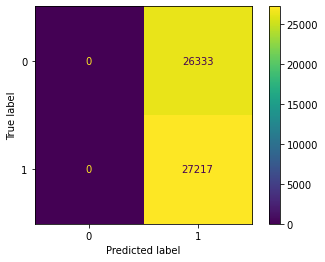

In [ ]:
#@title SVC based on all data we could get
full_svc = svm.SVC()
full_svc.fit(X, Y)

y_pred = full_svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

cma = confusion_matrix(y_test, y_pred, labels=full_svc.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=cma,
                              display_labels=full_svc.classes_)
cmplot.plot()

True Positive(TP)  =  23740
False Positive(FP) =  22256
True Negative(TN)  =  4077
False Negative(FN) =  3477
Accuracy of the binary classifier = 0.519


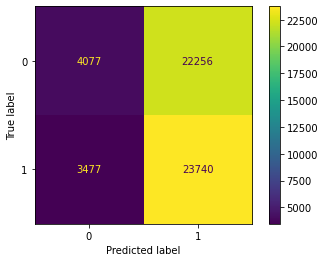

In [ ]:
#@title Naive Bayes based on all data we could get
full_NB = GaussianNB().fit(X_train, y_train)

full_nb_pred = full_NB.predict(X_test)

cm = confusion_matrix(y_test, full_nb_pred)

TN, FP, FN, TP = confusion_matrix(y_test, full_nb_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

full_Gaussian_matrix = confusion_matrix(y_test, full_nb_pred, labels=full_NB.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=full_Gaussian_matrix,
                              display_labels=full_NB.classes_)
cmplot.plot()

True Positive(TP)  =  15860
False Positive(FP) =  13585
True Negative(TN)  =  12748
False Negative(FN) =  11357
Accuracy of the binary classifier = 0.534


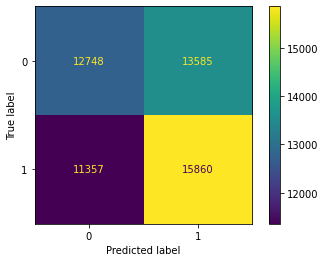

In [ ]:
#@title K-nearest Neighbors based on all data we could get
full_k_neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

full_k_neigh_pred = full_k_neigh.predict(X_test)

cm = confusion_matrix(y_test, full_k_neigh_pred)

TN, FP, FN, TP = confusion_matrix(y_test, full_k_neigh_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

full_kmatr = confusion_matrix(y_test, full_k_neigh_pred, labels=full_k_neigh.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=full_kmatr,
                              display_labels=full_k_neigh.classes_)
cmplot.plot()

True Positive(TP)  =  15171
False Positive(FP) =  14237
True Negative(TN)  =  12096
False Negative(FN) =  12046
Accuracy of the binary classifier = 0.509


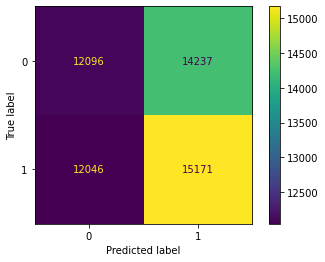

In [ ]:
#@title Decision Tree based on all data we could get
full_treeclf = DecisionTreeClassifier().fit(X_train, y_train)

full_treeclf_pred = full_treeclf.predict(X_test)

cm = confusion_matrix(y_test, full_treeclf_pred)

TN, FP, FN, TP = confusion_matrix(y_test, full_treeclf_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

full_tree_matr = confusion_matrix(y_test, full_treeclf_pred, labels=full_treeclf.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=full_tree_matr,
                              display_labels=full_treeclf.classes_)
cmplot.plot()

True Positive(TP)  =  16519
False Positive(FP) =  13226
True Negative(TN)  =  13107
False Negative(FN) =  10698
Accuracy of the binary classifier = 0.553


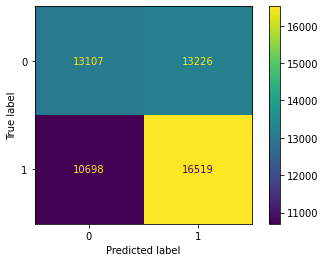

In [ ]:
#@title Logistic Regression based on all data we could get
full_logreg = LogisticRegression().fit(X_train, y_train)

full_logreg_pred = full_logreg.predict(X_test)

cm = confusion_matrix(y_test, full_logreg_pred)

TN, FP, FN, TP = confusion_matrix(y_test, full_logreg_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

full_regmat = confusion_matrix(y_test, full_logreg_pred, labels=full_logreg.classes_)
cmplot = ConfusionMatrixDisplay(confusion_matrix=full_regmat,
                              display_labels=full_logreg.classes_)
cmplot.plot()

As we might see all of this is not nearly enough to get proper predictions, as models aren't really changing.<br>
Thus, we conclude that classic ML classification algorithms could not be applied to the NLP field, because they lack language understanding and semantics.<br> We could train all of the algorithms above with word vectors, but this solution requires a lot of time and performance.<br> So instead we'll take a look at current SOTA models used in NLP field.<br> Them being transformer models.

#PART III Natural Language Models
We wanted sentiment analysis task to be solved, that is why we implemented 2 BERT models to check how they'll solve it<br>


You can work with any of those as they can be launched separately.

##RuBERT built for sentiment analysis

First of all we need to install the necessary library to work with transformer models available at <a href='https://huggingface.co/'>huggingface.co</a>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We've found a model that was trained exactly on the dataset we are wotking with, so let's use it to our task
it has to be downloaded along with tokenizer

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('blanchefort/rubert-base-cased-sentiment-mokoron')
model = AutoModelForSequenceClassification.from_pretrained('blanchefort/rubert-base-cased-sentiment-mokoron', return_dict=True)

@torch.no_grad()
def predict(text):
    inputs = tokenizer(text, max_length=512, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    predicted = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted = torch.argmax(predicted, dim=1).numpy()
    return predicted

Now we work with data, all we need is text and type.<br> We change our classes to suit the classes model trained on, description can be found <a href='https://huggingface.co/blanchefort/rubert-base-cased-sentiment-mokoron'>here</a> 

In [ ]:
new_y = pd.concat([positive, negative])
new_y = new_y.dropna().drop_duplicates()
new_y['ttype'].value_counts()
new_y.loc[(new_y.ttype == 1), ('ttype')] = 0
new_y.loc[(new_y.ttype == -1), ('ttype')] = 1
language_X = new_y['ttext']
language_Y = new_y['ttype']

split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(language_X, language_Y , test_size=0.25, random_state=42)

Now we get predictions and calculate the metrics

True Positive(TP)  =  28079
False Positive(FP) =  51
True Negative(TN)  =  28550
False Negative(FN) =  29
Accuracy of the binary classifier = 0.999


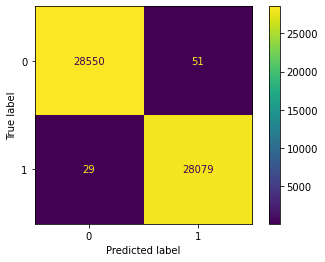

In [ ]:
#@title it is done the same way as before
language_y_pred = []
for que in X_test:
    language_y_pred.append(predict(que))

cm = confusion_matrix(y_test, language_y_pred)

TN, FP, FN, TP = confusion_matrix(y_test, language_y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

langmat = confusion_matrix(y_test, language_y_pred,)
cmplot = ConfusionMatrixDisplay(confusion_matrix=langmat,)
cmplot.plot()

As we can see here, the model is rather good, more than good it IS THE BEST! <br>But why actually. To be fair this model should be tested on different data not the one we use for our metrics, because there is a chance that our test examples were used during the training and the model just "remembers" them. <br>That is why we apply training and testing on different sets of examples. But this time we had no control over model training, and even if its good, we have to find another way to solve this task as these metrcis aren't actually that great.
<br>**And that leads us to** 

##Our own **tiny** dive **to** the **RuBERT** models' implementation

First of all we need to install the necessary library to work with transformer models available at <a href='https://huggingface.co/'>huggingface.co</a>

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 26.3 MB/s 
     |████████████████████████████████| 182 kB 53.2 MB/s 
     |████████████████████████████████| 7.6 MB 52.2 MB/s 


Our new model is trained to work with russian language with masked tokens prediction task, which basically means language understanding. We'll fine-tune it to our sentiment data and see how well the new model will solve our classification task.

In [3]:
#@title first we import libraries
import numpy as np
import torch
import transformers
import pandas as pd
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from tqdm import tqdm
from torch.utils.data import Dataset
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW, get_linear_schedule_with_warmup

get our data processed

In [4]:
names=["id", "tdate", "tmane", "ttext", "ttype", "trep", "trtv", "tfav", "tstcount", "tfol", "tfrien", "listcount"]
positive = pd.read_csv("positive.csv", delimiter=";", header=None, names=names)
negative = pd.read_csv("negative.csv", delimiter=";", header=None, names=names)
df = pd.concat([positive, negative])
df = df.dropna().drop_duplicates()
def regex(text):
    return re.sub("[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+", ' ', text)
df.ttext = df.ttext.apply(regex)
df

,id,tdate,tmane,ttext,ttype,trep,trtv,tfav,tstcount,tfol,tfrien,listcount
0,408906692374446080,1386325927,pleease_shut_up,хоть я и школота но поверь у нас то же сам...,1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,Да все таки он немного похож на него Но мой ...,1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,Ну ты идиотка я испугалась за тебя,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,Кто то в углу сидит и погибает от голода ...,1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,Вот что значит страшилка \nНо блин посмотре...,1,0,0,0,597,16,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
111918,425138243257253888,1390195830,Yanch_96,Но не каждый хочет что то исправлять,-1,0,0,0,1138,32,46,0
111919,425138339503943682,1390195853,tkit_on,скучаю так только вправляет мозги но я вс...,-1,0,0,0,4822,38,32,0
111920,425138437684215808,1390195876,ckooker1,Вот и в школу в говно это идти уже надо,-1,0,0,1,165,13,16,0
111921,425138490452344832,1390195889,LisaBeroud,Тауриэль не грусти обнял,-1,0,1,0,2516,187,265,0


Now we create dataset class that'll be used in our training

In [5]:
class CustomDataset(Dataset):

  def __init__(self, texts, targets, tokenizer, max_len=512):
    self.texts = texts
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    target = self.targets[idx]

    encoding = self.tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=self.max_len,
        return_token_type_ids=False,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True
    )

    return {
      'text': text,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

And classifier itself with 2 classes

In [6]:
class BertClassifier:
    def __init__(self, model_path, tokenizer_path, n_classes=2, epochs=1, model_save_path='/content/bert.pt'):
        self.model = BertForSequenceClassification.from_pretrained(model_path)
        self.tokenizer = BertTokenizer.from_pretrained(tokenizer_path)
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.model_save_path=model_save_path
        self.max_len = 512
        self.epochs = epochs
        self.out_features = self.model.bert.encoder.layer[1].output.dense.out_features
        self.model.classifier = torch.nn.Linear(self.out_features, n_classes)
        self.model.to(self.device)
    
    def preparation(self, X_train, y_train, X_valid, y_valid):
        # create datasets
        self.train_set = CustomDataset(X_train, y_train, self.tokenizer)
        self.valid_set = CustomDataset(X_valid, y_valid, self.tokenizer)

        # create data loaders
        self.train_loader = DataLoader(self.train_set, batch_size=2, shuffle=True)
        self.valid_loader = DataLoader(self.valid_set, batch_size=2, shuffle=True)

        # helpers initialization
        self.optimizer = AdamW(self.model.parameters(), lr=2e-5, correct_bias=False)
        self.scheduler = get_linear_schedule_with_warmup(
                self.optimizer,
                num_warmup_steps=0,
                num_training_steps=len(self.train_loader) * self.epochs
            )
        self.loss_fn = torch.nn.CrossEntropyLoss().to(self.device)
            
    def fit(self):
        self.model = self.model.train()
        losses = []
        correct_predictions = 0

        for data in tqdm(self.train_loader):
            input_ids = data["input_ids"].to(self.device)
            attention_mask = data["attention_mask"].to(self.device)
            targets = data["targets"].to(self.device)

            outputs = self.model(
                input_ids=input_ids,
                attention_mask=attention_mask
                )

            preds = torch.argmax(outputs.logits, dim=1)
            loss = self.loss_fn(outputs.logits, targets)

            correct_predictions += torch.sum(preds == targets)

            losses.append(loss.item())
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()
            self.scheduler.step()
            self.optimizer.zero_grad()

        train_acc = correct_predictions.double() / len(self.train_set)
        train_loss = np.mean(losses)
        return train_acc, train_loss
    
    def eval(self):
        print('eval')
        self.model = self.model.eval()
        losses = []
        correct_predictions = 0

        with torch.no_grad():
            for data in self.valid_loader:
                input_ids = data["input_ids"].to(self.device)
                attention_mask = data["attention_mask"].to(self.device)
                targets = data["targets"].to(self.device)

                outputs = self.model(
                    input_ids=input_ids,
                    attention_mask=attention_mask
                    )

                preds = torch.argmax(outputs.logits, dim=1)
                loss = self.loss_fn(outputs.logits, targets)
                correct_predictions += torch.sum(preds == targets)
                losses.append(loss.item())
        
        val_acc = correct_predictions.double() / len(self.valid_set)
        val_loss = np.mean(losses)
        return val_acc, val_loss
    
    def train(self):
        best_accuracy = 0
        for epoch in range(self.epochs):
            print(f'Epoch {epoch + 1}/{self.epochs}')
            train_acc, train_loss = self.fit()
            print(f'Train loss {train_loss} accuracy {train_acc}')
            val_acc, val_loss = self.eval()
            print(f'Val loss {val_loss} accuracy {val_acc}')
            print('-' * 10)

            if val_acc > best_accuracy:
                torch.save(self.model, '/content/bert.pt')
                best_accuracy = val_acc
        self.model = torch.load(self.model_save_path)
    
    def predict(self, text):
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        out = {
              'text': text,
              'input_ids': encoding['input_ids'].flatten(),
              'attention_mask': encoding['attention_mask'].flatten()
          }
        
        input_ids = out["input_ids"].to(self.device)
        attention_mask = out["attention_mask"].to(self.device)
        
        outputs = self.model(
            input_ids=input_ids.unsqueeze(0),
            attention_mask=attention_mask.unsqueeze(0)
        )
        
        prediction = torch.argmax(outputs.logits, dim=1).cpu().numpy()[0]

        return prediction

Now we download our model and tokenizer from <a href = 'https://huggingface.co/cointegrated/rubert-tiny2'>here</a><br>
The model we chose is a small version of BERT and we chose it to see quick implementation and solution of our task, so our model might not get THE BEST results for this task, but that is also not our aim here, we just want to see how the new language models act in the NLP field.
<br>We set the number of classes equals to 2. And 3 epochs to see how well it'll train

In [7]:
classifier = BertClassifier(
        model_path='cointegrated/rubert-tiny2',
        tokenizer_path='cointegrated/rubert-tiny2',
        n_classes=2,
        epochs=3,
        model_save_path='/content/bert.pt'
)

Downloading:   0%|          | 0.00/715 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/118M [00:00<?, ?B/s]

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not 

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/401 [00:00<?, ?B/s]

Now we change our labels to 0 and 1<br>
0 being positive class<br>
1 being negative class

In [8]:
df.loc[(df.ttype == 1), ('ttype')] = 0
df.loc[(df.ttype == -1), ('ttype')] = 1
X = df['ttext']
Y = df['ttype']

In [9]:
#@title now we split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.25, random_state=42)

In [10]:
#@title prepare it for training
classifier.preparation(
        X_train=list(X_train),
        y_train=list(y_train),
        X_valid=list(X_test),
        y_valid=list(y_test)
    )

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


and training the classifier<br>
It will take some time

In [11]:
classifier.train()

Epoch 1/3


100%|██████████| 85063/85063 [40:51<00:00, 34.69it/s]


Train loss 0.822440632652149 accuracy 0.733131520940485
eval
Val loss 0.8210741760943127 accuracy 0.7561410005466505
----------
Epoch 2/3


100%|██████████| 85063/85063 [40:49<00:00, 34.72it/s]


Train loss 0.7861066420281284 accuracy 0.7849875091844233
eval
Val loss 0.9189490165077137 accuracy 0.7650284787247175
----------
Epoch 3/3


100%|██████████| 85063/85063 [40:49<00:00, 34.73it/s]


Train loss 0.7401721163552887 accuracy 0.8116561351947098
eval
Val loss 0.952934950822718 accuracy 0.7660688779558801
----------


In [12]:
#@title Now we'll check our predictions
predictions = [classifier.predict(x) for x in X_test]

In [13]:
#@title get our metrics
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1score = precision_recall_fscore_support(y_test, predictions,average='macro')[:3]

print(f'precision: {precision}, recall: {recall}, f1score: {f1score}')

precision: 0.7660962142331966, recall: 0.7661100685544979, f1score: 0.7660680137073965


True Positive(TP)  =  21667
False Positive(FP) =  6825
True Negative(TN)  =  21776
False Negative(FN) =  6441
Accuracy of the binary classifier = 0.766


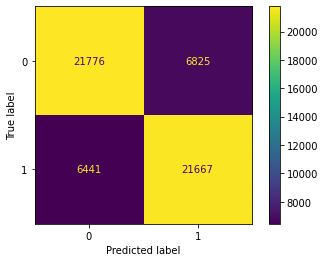

In [14]:
#@title and check the results the same way as before
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

tinymat = confusion_matrix(y_test, predictions,)
cmplot = ConfusionMatrixDisplay(confusion_matrix=tinymat,)
cmplot.plot()

As we can see, we got high accuracy on the main diagonal of the matrix(in yellow) <br>Antidiagonal shows low error (in purple)
<br>Basically we got the accuracy of 75% in 3 epochs, we can change the model for large rubert and change the number of epochs based on the practical results of several training to get the best accuracy possible, but as stated before that was never our aim. Our aim was to 
*   Check the morphological hypothesis;
*   Train classic classification models;
*   See how good or bad they can be used in NLP field;
*   See current SOTA technologies in this field and implement them to solve the task
<br> All of that was conducted in our research.

